# Introduction to ImageJ Ops

[ImageJ Ops](https://imagej.net/ImageJ_Ops) is a library for N-dimensional image processing.

The primary design goals of Ops are:

1. __Ease of use.__ Ops provides a wealth of easy-to-use image processing operations ("ops").
2. __Reusability.__ Ops extends Java's mantra of "[write once, run anywhere](https://en.wikipedia.org/wiki/Write_once,_run_anywhere)" to image processing algorithms. Algorithms written in the Ops framework are usable as-is from any [SciJava](https://imagej.net/SciJava)-compatible software project, such as [ImageJ](https://imagej.net/ImageJ), [CellProfiler](https://imagej.net/CellProfiler), [KNIME](https://imagej.net/KNIME), [OMERO](https://imagej.net/OMERO) and [Alida](https://imagej.net/Alida).
3. __Reproducibility.__ Ops are deterministic: calling the same op twice with the same arguments yields the same result, always. And all ops are versioned.
4. __Power.__ An op may consist of any number of typed input and output parameters. Ops may operate on arbitrary data structures, including images of N dimensions stored in a myriad of different ways: as files on disk, programmatically generated in memory, or in remote databases.
5. __Extensibility.__ Ops provides a robust framework for writing new ops, and for extending existing ops in new directions. See the "Extending ImageJ - Ops" tutorial notebook for details.
6. __Speed.__ The Ops framework provides a means to override any general-but-slow op with a faster-but-more-specific alternative, fully transparently to the user.

Let's dive in to doing some image processing using ImageJ Ops.

## Getting started

In [1]:
#@ImageJ ij

// Behind a firewall? Configure your proxy settings here.
//System.setProperty("http.proxyHost","myproxy.domain")
//System.setProperty("http.proxyPort","8080")

// Define some handy shorthands!
import net.imglib2.RandomAccessibleInterval
tile = { images ->
  int[] gridLayout = images[0] in List ?
    [images[0].size, images.size] : // 2D images list
    [images.size] // 1D images list
  RandomAccessibleInterval[] rais = images.flatten()
  ij.notebook().mosaic(gridLayout, rais)
}

"ImageJ is ready to go."

ImageJ is ready to go.

Let's open up the friendly Clown image to use for our experiments. (For the [coulrophobic](https://en.wikipedia.org/wiki/Coulrophobia), feel free to use the [Fluorescent Cells](http://imagej.net/images/FluorescentCells.jpg) instead.)

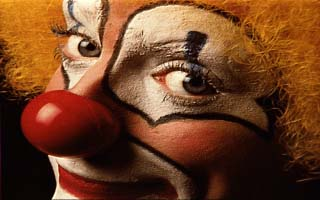

In [2]:
clown = ij.io().open("http://imagej.net/images/clown.png")

He's a bit large, so let's scale him down. We'll use the `transform.scaleView` op.

For succinctness, we'll write only `scaleView` rather than the fully qualified op name `transform.scaleView`.

Right now, there is no default interpolation strategy, so we have to explicitly specify one. We'll use N-linear interpolation, since it tends to look pretty nice.

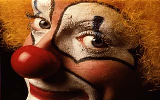

In [3]:
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory

scaleFactors = [0.5, 0.5, 1] // Reduce X and Y to 50%; leave C dimension alone.
interpolationStrategy = new NLinearInterpolatorFactory()

image = ij.op().run("scaleView", clown, scaleFactors, interpolationStrategy)

Lastly, let's prepare a grayscale version, which will work better for demonstrating certain ops later. We'll crop to only the red channel for that.

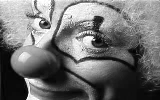

In [4]:
import net.imglib2.FinalInterval
w = image.dimension(0); h = image.dimension(1)
slice = FinalInterval.createMinSize(0, 0, 0, w, h, 1)

grayImage = ij.op().run("crop", image, slice, true)

## Learning about available ops

You can get a complete list of available ops using the `ops()` method. But it is a bit overwhelming, so here is a structured version organized by namespace:

In [5]:
import net.imagej.ops.OpUtils
opsByNS = [:]
ij.op().ops().each{op ->
  ns = OpUtils.getNamespace(op)
  name = OpUtils.stripNamespace(op)
  if (!opsByNS.containsKey(ns)) opsByNS.put(ns, name)
  else opsByNS.put(ns, opsByNS.get(ns) + ', ' + name)
}
opsByNS.put('<global>', opsByNS.remove(null))
opsByNS

Key,Value
convert,"bit, cfloat32, cfloat64, clip, copy, float32, float64, imageType, int16, int32, int64, int8, normalizeScale, scale, uint12, uint128, uint16, uint2, uint32, uint4, uint64, uint8"
copy,"img, imgLabeling, iterableInterval, labelingMapping, rai, type"
create,"img, imgFactory, imgLabeling, imgPlus, integerType, kernel, kernelGauss, kernelLog, labelingMapping, nativeType, object"
deconvolve,"accelerate, firstGuess, normalizationFactor, richardsonLucy, richardsonLucyCorrection, richardsonLucyTV, richardsonLucyUpdate"
filter,"addNoise, addPoissonNoise, convolve, correlate, createFFTOutput, dog, fft, fftSize, gauss, ifft, linearFilter, max, mean, median, min, padFFTInput, padInput, padShiftFFTKernel, paddingIntervalCentered, paddingIntervalOrigin, sigma, variance"
geom,"boundarySize, boundarySizeConvexHull, boundingBox, boxivity, centerOfGravity, centroid, circularity, compactness, contour, convexHull, convexity, eccentricity, feretsAngle, feretsDiameter, mainElongation, majorAxis, marchingCubes, maximumFeret, maximumFeretsAngle, maximumFeretsDiameter, medianElongation, minimumFeret, minimumFeretsAngle, minimumFeretsDiameter, minorAxis, roundness, secondMoment, size, sizeConvexHull, smallestEnclosingBoundingBox, solidity, spareness, sphericity, vertexInterpolator, verticesCount, verticesCountConvexHull, voxelization"
haralick,"asm, clusterPromenence, clusterShade, contrast, correlation, differenceEntropy, differenceVariance, entropy, icm1, icm2, ifdm, maxProbability, sumAverage, sumEntropy, sumVariance, textureHomogeneity, variance"
hog,hog
image,"ascii, cooccurrenceMatrix, distancetransform, equation, fill, histogram, integral, invert, normalize, squareIntegral"
imagemoments,"centralMoment00, centralMoment01, centralMoment02, centralMoment03, centralMoment10, centralMoment11, centralMoment12, centralMoment20, centralMoment21, centralMoment30, huMoment1, huMoment2, huMoment3, huMoment4, huMoment5, huMoment6, huMoment7, moment00, moment01, moment10, moment11, normalizedCentralMoment02, normalizedCentralMoment03, normalizedCentralMoment11, normalizedCentralMoment12, normalizedCentralMoment20, normalizedCentralMoment21, normalizedCentralMoment30"


There is a helpful `help` op which prints out information about an op. We can use it to better understand what sorts of operations are possible, and what kinds of arguments they expect:

In [6]:
ij.op().help('gauss')

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.DefaultGaussRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas,
		OutOfBoundsFactory outOfBounds?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.GaussRAISingleSigma(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		OutOfBoundsFactory outOfBounds?)

The information above tells us that there are two available `gauss` operations: one which takes a list (`double[]`) of sigmas, and another which takes a single (`double`) sigma.

There are a couple of important subtleties here:

1. Some arguments have a `?` suffix, which means they are optional. If you leave them off, something reasonable will be done by default. In this case, the `out` and `outOfBounds` arguments are optional. You can leave them off ___in right-to-left order___. E.g., in the case above, calling `gauss(a, b, c)` means `gauss(out, in, sigmas)` and _not_ `gauss(in, sigmas, outOfBounds)`. If you want to omit the `out` argument while passing the `outOfBounds` argument, you can pass `null` for `out`—i.e., `gauss(null, in, sigmas, outOfBounds)`.

2. The `out` argument is both an input _and_ an output. Hence, whatever object you pass as the `out` parameter will also be returned as the output. In this case, since `out` is optional, if you do not pass the `out` parameter (or you pass `null`), then one will be synthesized and returned.

Lastly, you might be wondering what a `RandomAccessibleInterval` is. For now, it is enough to know it is an ImageJ image. See the "Image samples" tutorial for a more detailed introduction.

Let's try calling the first `gauss` op:

In [7]:
// Smudge him up horizontally.
double[] horizSigmas = [8, 0, 0]
horizGauss = ij.op().filter().gauss(image, horizSigmas)

// And now vertically.
double[] vertSigmas = [0, 8, 0]
vertGauss = ij.op().filter().gauss(image, vertSigmas)

// We can also blur the channels.
double[] channelSigmas = [0, 0, 1]
channelGauss = ij.op().filter().gauss(image, channelSigmas)

[["image":image, "horizontal blur":horizGauss, "vertical blur":vertGauss, "channel blur":channelGauss]]

image,horizontal blur,vertical blur,channel blur


There are two main ways to execute an op:

1. The _type-safe_ way using a built-in method:
   ```java
   ij.op().foo().bar(...)
   ```
   This way tends to be nicer from type-safe languages like Java.
   
2. The _dynamic_ way using the `run` method:
   ```java
   ij.op().run("foo.bar", ...)
   ```
   This way tends to be nicer from dynamically typed scripting languages.

With the dynamic approach, passing the namespace is optional, so you can also write:
```java
ij.op().run("bar", ...)
```
If there are ops with the same name across multiple namespaces (e.g., `math.and` and `logic.and`), then passing the short name will consider the op signatures across all namespaces.

You will see both syntaxes used throughout this notebook.

## Generating images

Images have to come from somewhere. You can use `ij.io().open(...)` to read one in from an external source such as files on disk, like we did above. But there are other ways, too.

### Creating an empty image

You can create an empty (zero-filled) image using the `create.img` op.

In [8]:
ij.op().help("create.img")

Available operations:
	(Img out) =
	net.imagej.ops.create.img.CreateImgFromImg(
		Img in)
	(Img out) =
	net.imagej.ops.create.img.CreateImgFromII(
		IterableInterval in)
	(Img out) =
	net.imagej.ops.create.img.CreateImgFromRAI(
		RandomAccessibleInterval in)
	(Img out) =
	net.imagej.ops.create.img.CreateImgFromDimsAndType(
		Dimensions in1,
		NativeType in2,
		ImgFactory factory?)
	(Img out) =
	net.imagej.ops.create.img.CreateImgFromInterval(
		Interval in)

In [9]:
def info(name, image) {
  imageType = image.firstElement().getClass().getSimpleName()
  name + " = " + image.dimension(0) + " x " + image.dimension(1) + " x " + image.dimension(2) + " : " +
          imageType + "\n"
}

// Create an empty image of the same size as an existing image.
empty = ij.op().run("create.img", image)

// Create an empty image based on another image, but of different type.
import net.imglib2.type.logic.BitType
bitType = ij.op().run("create.img", image, new BitType())

// Create an image from scratch.
import net.imglib2.type.numeric.real.FloatType
smallFloat = ij.op().run("create.img", [25, 17, 2], new FloatType())

info("Original ", image) +
info("Empty one", empty) +
info("Bit image", bitType) +
info("Small float", smallFloat)

Original  = 160 x 100 x 3 : UnsignedByteType
Empty one = 160 x 100 x 3 : UnsignedByteType
Bit image = 160 x 100 x 3 : BitType
Small float = 25 x 17 x 2 : FloatType


See "Converting between image types" below for more about image types.

### Copying an image

You can easily make a copy of an image using ops from the `copy` namespace.

In [10]:
ij.op().help("copy.rai")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.copy.CopyRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)

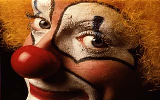

In [11]:
copy = ij.op().run("copy.rai", image)

### Generating an image from a formula

The `equation` op allows you to generate an image from a formula in JavaScript syntax.

Such images can be useful for testing without needing an external image source, or a long and bulky list of numbers.

In [12]:
ij.op().help("equation")

Available operations:
	(IterableInterval out?) =
	net.imagej.ops.image.equation.DefaultEquation(
		IterableInterval out?,
		String in)

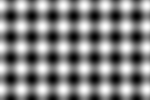

In [13]:
import net.imglib2.type.numeric.integer.UnsignedByteType
sinusoid = ij.op().run("create.img", [150, 100], new UnsignedByteType())
formula = "63 * (Math.cos(0.3*p[0]) + Math.sin(0.3*p[1])) + 127"
ij.op().image().equation(sinusoid, formula)

### Wrapping an array as an image

There is no op yet to create an image by wrapping an existing array of values. For now, you can use ImgLib2 utility methods for that:

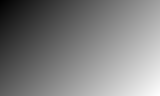

In [14]:
// Here we have a gradient ramp in an array.
w = 160; h = 96
byte[] pixels = new byte[w * h]
for (y in 0..h-1) {
  for (x in 0..w-1) {
    pixels[y * w + x] = x + y
  }
}

// Wrap the array into an image.
import net.imglib2.img.array.ArrayImgs
ramp = ArrayImgs.unsignedBytes(pixels, w, h)

## Computing statistics

The `stats` package has routines for computing numerical statistics.

Here is a rundown of many of them:

In [15]:
sinusoid32 = ij.op().run("create.img", [150, 100])
formula = "63 * (Math.cos(0.3*p[0]) + Math.sin(0.3*p[1])) + 127"
ij.op().image().equation(sinusoid32, formula)

["geometricMean": ij.op().stats().geometricMean(sinusoid32),
"harmonicMean": ij.op().stats().harmonicMean(sinusoid32),
"kurtosis": ij.op().stats().kurtosis(sinusoid32),
"max": ij.op().stats().max(sinusoid32),
"mean": ij.op().stats().mean(sinusoid32),
"median": ij.op().stats().median(sinusoid32),
"min": ij.op().stats().min(sinusoid32),
"moment1AboutMean": ij.op().stats().moment1AboutMean(sinusoid32),
"moment2AboutMean": ij.op().stats().moment2AboutMean(sinusoid32),
"moment3AboutMean": ij.op().stats().moment3AboutMean(sinusoid32),
"moment4AboutMean": ij.op().stats().moment4AboutMean(sinusoid32),
"size": ij.op().stats().size(sinusoid32),
"skewness": ij.op().stats().skewness(sinusoid32),
"stdDev": ij.op().stats().stdDev(sinusoid32),
"sum": ij.op().stats().sum(sinusoid32),
"sumOfInverses": ij.op().stats().sumOfInverses(sinusoid32),
"sumOfLogs": ij.op().stats().sumOfLogs(sinusoid32),
"sumOfSquares": ij.op().stats().sumOfSquares(sinusoid32),
"variance": ij.op().stats().variance(sinusoid32)]

Key,Value
geometricMean,106​.86402515788897
harmonicMean,60​.81451530914875
kurtosis,2​.250389182944452
max,252​.9996057999923
mean,130​.35596075261444
median,129​.34019425677636
min,1​.293813403205192
moment1AboutMean,-2​.877214910768089E-13
moment2AboutMean,3982​.1563522625042
moment3AboutMean,-10221​.960619118927


Note that `min` and `max` are particularly useful, since they report the actual minimum and maximum values of the image. These values are helpful for [autoscaling](https://imagej.net/Troubleshooting#The_image_I_loaded_is_displayed_all_black.21_But_it_is_not_black.21) to improve an image's appearance.

## Math on images

In the `math` namespace, Ops provides traditional mathematical operations such as `add`, `subtract`, `multiply` and `divide`. These operations are overloaded in several ways:

* Operate pixelwise between two images—e.g., `math.add(image1, image2)` when `image1` and `image2` have the same dimensions.
* Operate between an image and a constant—e.g., `math.add(image, 5)` to add 5 to each sample of `image`.
* Operate between two numerical values—e.g., `math.add(3, 5)` to compute the sum of 3 and 5.

Some `math` ops are also already heavily optimized, since we used the `math.add` op as a testbed to validate that Ops could perform as well or better than ImageJ 1.x does.

In [16]:
// Prepare a couple of equally sized images.
import net.imglib2.type.numeric.real.FloatType
image1 = ij.op().run("create.img", [160, 96], new FloatType())
image2 = ij.op().run("copy.rai", image1)

// Gradient toward bottom right.
ij.op().image().equation(image1, "p[0] + p[1]")
minMax1 = ij.op().stats().minMax(image1)
println("image1 range = (" + minMax1.getA() + ", " + minMax1.getB() + ")")

// Sinusoid.
ij.op().image().equation(image2, "64 * (Math.sin(0.1 * p[0]) + Math.cos(0.1 * p[1])) + 128")
minMax2 = ij.op().stats().minMax(image2)
println("image2 range = (" + minMax2.getA() + ", " + minMax2.getB() + ")")

[["image1":image1, "image2":image2]]

image1 range = (0.0, 254.0)
image2 range = (0.020272091031074524, 255.97271728515625)


image1 image2 <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABgCAYAAACaJ3mZAAAF20lEQVR42u3S05YYCBRFwRt2bNu2bdu2bWsFHdu2bdu2bdvOnjVfcV9OfUOZmREkSBCCBg1KsGDBCB48OCFChCBkyJAEBAQQKlQoQocOTZgwYQgbNizhwoUjfPjwRIgQgYgRIxIpUiQiR45MlChRiBo1KtGiRSN69OjEiBGDmDFjEitWLGLHjk2cOHGIGzcu8eLFI378+CRIkICECROSKFEiEidOTJIkSUiaNCnJkiUjefLkpEiRgpQpU5IqVSpSp05NmjRpSJs2LenSpSN9+vRkyJCBjBkzkilTJjJnzkyWLFnImjUr2bJlI3v27OTIkYOcOXOSK1cucufOTZ48ecibNy/58uUjf/78FChQgIIFC1KoUCEKFy5MkSJFKFq0KMWKFaN48eKUKFGCkiVLUqpUKUqXLk2ZMmUoW7Ys5cqVo3z58lSoUIGKFStSqVIlKleuTJUqVahatSrVqlWjevXq1KhRg5o1a1KrVi1q165NnTp1qFu3LvXq1aN+/fo0aNCAhg0b0qhRIxo3bkyTJk1o2rQpzZo1o3nz5rRo0YKWLVvSqlUrWrduTZs2bWjbti3t2rWjffv2dOjQgY4dO9KpUyc6d+5Mly5d6Nq1K926daN79+706NGDnj170qtXL3r37k2fPn3o27cv/fr1o3///gwYMICBAwcyaNAgBg8ezJAhQwgMDGTo0KEMGzaM4cOHM2LECEaOHMmoUaMYPXo0Y8aMYezYsYwbN47x48czYcIEJk6cyKRJk5g8eTJTpkxh6tSpTJs2jenTpzNjxgxmzpzJrFmzmD17NnPmzGHu3LnMmzeP+fPns2DBAkz5lM8r38KFCzHlUz6vfIsWLcKUT/m88i1evBhTPuXzyrdkyRJM+ZTPK9/SpUsx5VM+r3zLli3DlE/5vPItX74cUz7l88q3YsUKTPmUzyvfypUrMeVTPq98q1atwpRP+bzyrV69GlM+5fPKt2bNGkz5lM8r39q1azHlUz6vfOvWrcOUT/m88q1fvx5TPuXzyrdhwwZM+ZTPK9/GjRsx5VM+r3ybNm3ClE/5vPJt3rwZUz7l88q3ZcsWTPmUzyvf1q1bMeVTPq9827Ztw5RP+bzybd++HVM+5fPKt2PHDkz5lM8r386dOzHlUz6vfLt27cKUT/m88u3evRtTPuXzyrdnzx5M+ZTPK9/evXsx5VM+r3z79u3DlE/5vPLt378fUz7l88p34MABTPmUzyvfwYMHMeVTPq98hw4dwpRP+bzyHT58GFM+5fPKd+TIEUz5lM8r39GjRzHlUz6vfMeOHcOUT/m88h0/fhxTPuXzynfixAlM+ZTPK9/Jkycx5VM+r3ynTp3ClE/5vPKdPn0aUz7l88p35swZTPmUzyvf2bNnMeVTPq98586dw5RP+bzynT9/HlM+5fPKd+HCBUz5lM8r38WLFzHlUz6vfJcuXcKUT/m88l2+fBlTPuXzynflyhVM+ZTPK9/Vq1cx5VM+r3zXrl3DlE/5vPJdv34dUz7l88p348YNTPmUzyvfzZs3MeVTPq98t27dwpRP+bzy3b59G1M+5fPKd+fOHUz5lM8r3927dzHlUz6vfPfu3cOUT/m88t2/fx9TPuXzyvfgwQNM+ZTPK9/Dhw8x5VM+r3yPHj3ClE/5vPI9fvwYUz7l88r35MkTTPmUzyvf06dPMeVTPq98z549w5RP+bzyPX/+HFM+5fPK9+LFC0z5lM8r38uXLzHlUz6vfK9evcKUT/m88r1+/RpTPuXzyvfmzRtM+ZTPK9/bt28x5VM+r3zv3r3DlE/5vPK9f/8eUz7l88r34cMHTPmUzyvfx48fMeVTPq98nz59wpRP+bzyff78GVM+5fPK9+XLF0z5lM8r39evXzHlUz6vfN++fcOUT/m88n3//h1TPuXzyvfjxw9M+ZTPK9/Pnz8x5VM+r3y/fv3ClE/5vPL9/v0bUz7l88r3588fTPmUzyvf379/MeVTPq98//79w5RP+bzy/e8/F1RzTPOkjqgAAAAASUVORK5CYII=" /> <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABgCAYAAACaJ3mZAAAy9ElEQVR42sWdA7Aty7K1+1jX59q2bdu2bdu2bdu2bdu27z1GvfjmH9+KcTKqunvtc/73dkTFXnPOnrNrZI7Myqquypw++clPts9//vPtq1/9avv2t7/dfvjDH7af//zn7be//W3705/+1P72t7+1f//7322//fZrBx10UDvkkEPaYYcd1uq/ww8/vB166KHt4IMPbgcccED7z3/+0/7xj3+0v/zlL+33v/99+9WvftV+8pOftO9973vtG9/4RvvSl77UPv3pT7ePfvSj7X3ve197xzve0d70pje117zmNe3lL395e+ELX9ie85zntGc84xntKU95SnviE5/YHve4x7XHPOYx7VGPelR75CMfudV4/ehHP7o99rGPbU94whPak5/85Pb0pz+9PfvZz24veMEL2ktf+tL26le/ur3xjW9sb3/729t73/ve9uEPf7h96lOfal/4whfa1772tfad73yn/ehHP2q/+MUv2u9+97v25z//uf3973/fYN9///032ME3h51ruFbs/Aa/9ctf/rL9+Mc/bt/97nfb17/+9c09ufdHPvKRTV/oE32jjy972cu2sIMB7GACGxhH2JEN13E9MuP7/A6/h0yRLTJG1twX2X/xi1/c9Id+0T/6KXb6Dw50iU7BB876D3nACbEjL+QGd+AQ8kSuyBc5wzU4h/zf8573tOkTn/hEl4C/+c1v2h//+McNAf/1r39tCHjggQduEbB2Zk4JEBBwSUDAIwSEUQmYSpCACBchpxIe8YhHbBp/LxHwVa96VXvDG97Q3va2t20REEH0CKjxVQKOsI+UIAH5TQnIvSQgfagEpK/0mb6DASxJwIq7Gh+y4ntJwDQ+Ccj91xBwzviQg9jhBhwBO5yRgHBJAsIxCfihD33o/xHw4x//ePvc5z7XvvKVr7Rvfetb7Qc/+EH72c9+1n7961+3P/zhD+2vf/1r++c//9n++9//HsEaVISt1xEtoSphyQv0lPD4xz9+I+Qk38Mf/vBN42/exzty3ZOe9KT2tKc9rT3rWc9qz3/+89tLXvKS9spXvrK9/vWvb29961s3wBHAdo1vhF3PL3a+M1JCegGVgFFgHBgJfaXP9B0MYAGTnl/yiVsSih1Z8b2jyvjS8egFU+eJHY6IHfkhR7iEXJEvHINryP2DH/xge/e7392mj33sY+0zn/nMZkj85je/2b7//e9vPBVDJp6LITStoSrCTugBICkdgbSQ146gBDuiJdARlQAxIAhEQQnPe97zNkp46lOfujX86gEQ/sMe9rCtliRMT4D3fO5zn9te9KIXtVe84hXtda97XXvLW97S3vWud7UPfOADDeP77Gc/27785S9vGd9Pf/rTLeOr2PWCI+x6frHzG/wWSuC3uYdK4N4ogb7QJ/pGH1/84hdvsD/zmc/cwq73k3gVuyMAMuJ6vsf3+R1+L40PpXNfZK/j0fjop8ZXHc8IO1yoo16GXcgTTsEt5Iy84Rzyf+c739mmuVgIa9AT2JkkYTbJl97P4df4LzsC6bMjb37zm9trX/vaTfwHYYyB9H5YuOR76EMf2h7ykIe0Bz/4wZv/eY0yUJCK0AvqCXqxEPFnLxYyDjQGxqpVxBx2PUB6/hp6ZOz7/ve/vxt66PnBoOGBDYwj7JJQL5jDMDJFtsgYWXPfdDz0i/7RzxyGwZHYwVmxIw84kd4v478c9ZCzox7yZ9SbsAY9gcMwRIG5esHsDCyHZCqDxt92AvJpBXgAvV8OQb0YqDcEYcl4M8mHoBH6gx70oPbABz5wq/EahaAMSYg

Let's test `math.add(image, number)`:

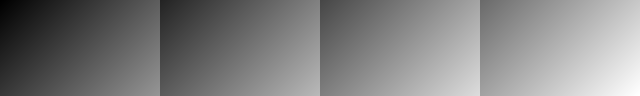

In [17]:
addImage = image1 // Try also with image2!
tile([
  addImage,
  ij.op().run("math.add", ij.op().run("copy.rai", addImage), 60),
  ij.op().run("math.add", ij.op().run("copy.rai", addImage), 120),
  ij.op().run("math.add", ij.op().run("copy.rai", addImage), 180)
])

Notice how we had to make a copy of the source image for each `add(image, number)` above? This is because right now, the best-matching `math.add` op is an _inplace_ operation, modifying the source image. Ops is still young, and needs more fine tuning! In the meantime, watch out for details like this.

Now we'll try `math.add(image1, image2)` and `math.subtract(image1, image2)`:

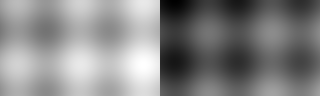

In [18]:
sum = ij.op().run("math.add", image1, image2)
diff = ij.op().run("math.subtract", image1, image2)
tile([sum, diff])

Here is `math.multiply(image1, image2)`:

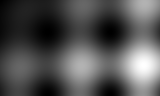

In [19]:
ij.op().run("math.multiply", image1, image2)

And finally `math.divide(image1, image2)`:

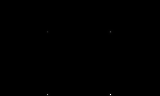

In [20]:
ij.op().run("math.divide", image1, image2)

## Evaluating expressions

ImageJ Ops offers a powerful expression evaluation op, built on SciJava's [Parsington](https://github.com/scijava/parsington) library:

In [21]:
ij.op().help("eval")

Available operations:
	(Object out) =
	net.imagej.ops.eval.DefaultEval(
		String in,
		Map vars?)

Operators in the expression map to ops as follows:

In [22]:
import net.imagej.ops.eval.OpEvaluator
new OpEvaluator().getOpMap()

Key,Value
>>,math​.rightShift
*,math​.multiply
<,logic​.lessThan
>,logic​.greaterThan
/,math​.divide
-,math​.subtract
<<,math​.leftShift
<=,logic​.lessThanOrEqual
>>>,math​.unsignedRightShift
&,math​.and


You can also call any op in an `eval` statement as a function, using familiar function syntax.

Here is an example of the `eval` op being used to compute a [Difference of Gaussians](https://en.wikipedia.org/wiki/Difference_of_Gaussians):

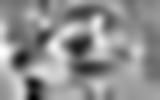

In [23]:
image32 = ij.op().convert().float32(grayImage)
dogFormula = "gauss(image, [10, 10, 1]) - gauss(image, [5, 5, 1])"
dog = ij.op().eval(dogFormula, ["image": image32])

## Converting between image types

Did you notice in the previous section that we computed the DoG on a `float32` version of the image? If we do not do this, the result will be wrong:

In [24]:
dogWrong = ij.op().eval(dogFormula, ["image": grayImage])
dogConverted = ij.op().convert().uint8(dog)
[["dogWrong":dogWrong, "dogConverted":dogConverted]]

dogWrong,dogConverted


As you can see, a DoG computed on the original `uint8` version of the image looks essentially the same as the `float32` DoG converted to `uint8`.

The issue is that `uint8` images have only 8 bits per channel, with values ranging from 0 to 255. So while the equation is dutifully evaluated, non-integer values are truncated, and then only the lowest 8 bits are retained.

Using a richer image type like `float32` avoids the problem. The `float32` type uses 32-bit [IEEE floating point](https://en.wikipedia.org/wiki/IEEE_floating_point) numbers for its samples, which an approximate range of
$-3.4 \times 10^{38}$
to
$3.4 \times 10^{38}$.
This type requires four times as much memory as `uint8`, but math errors will accumulate much less severely in common cases.

<div style="float: left"><img src="http://imagej.net/_images/a/a8/Imagej1-icon.png" width="48"></div>

For those familiar with [ImageJ 1.x](http://imagej.net/ImageJ1), `float32` corresponds to ImageJ 1.x's "32-bit" type in the Image &rarr; Type menu, and is typically what people choose when performing sequences of mathematical operations.

<div style="clear: left"></div>

### Built-in image types

In ImageJ Ops, many image types are available:

In [25]:
ij.op().ops().findAll{op ->
  op.startsWith("convert.big") ||
  op.startsWith("convert.bit") ||
  op.startsWith("convert.cfloat") ||
  op.startsWith("convert.float") ||
  op.startsWith("convert.int") ||
  op.startsWith("convert.uint")
}.collect{op -> op[8..-1]}

bit
cfloat32
cfloat64
float32
float64
int16
int32
int64
int8
uint12
uint128


In some circumstances, one of the above types is more appropriate than `float32`. For example, if we are squaring an image, we could use `uint16`, since the square of a number from 0 to 255 will always be in the range of 0 to 65535. It may sometimes make sense to use a high-precision integer type such as `uint128` rather than a potentially lossy floating point type like `float32`.

### Methods of type conversion

Ops provides four built-in ways of converting image values across types:

* `convert.copy` tranfers the values directly. This is the fastest method, but there is no bounds checking, so you may see overflow, or in some cases even end up with invalid sample values.
* `convert.clip` is like `copy` but includes bounds checking. Values less than the minimum are _clipped_ (also called _clamped_) to the minimum value, and values greater than the maximum are clipped to the maximum.
* `convert.scale` multiplies sample values by a scale factor, such that the intensities fall into the same _relative histogram_ over the whole target type:
  $[sourceTypeMin, sourceTypeMax] \to [destTypeMin, destTypeMax]$.
  E.g., converting from `uint8` to `uint16` linearly scales
  $[0, 255] \to [0, 65535]$.
* `convert.normalizeScale` multiplies sample values by a scale factor, such that intensities are distributed across the _full range_ of the target type:
  $[sourceDataMin, sourceDataMax] \to [destTypeMin, destTypeMax]$.
  E.g., converting a `uint8` image with an actual minimum sample value of 16 and actual maximum sample value of 127 to `uint16` linearly scales
  $[16, 127] \to [0, 65535]$.

Below, we show how to convert images using these approaches.

Original: min = 129, max = 640


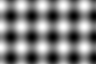

In [26]:
// Make a handy method for printing the image min/max.
printMinMax = { prefix, image ->
  minMax = ij.op().stats().minMax(image)
  println(prefix + ": min = " + minMax.getA() + ", max = " + minMax.getB())
}

// Create an image with an illustrative range of intensities.
import net.imglib2.type.numeric.integer.UnsignedShortType
imageToConvert = ij.op().run("create.img", [96, 64], new UnsignedShortType())
formula = "128 * (Math.cos(0.3*p[0]) + Math.sin(0.3*p[1])) + 384"
ij.op().image().equation(imageToConvert, formula)
printMinMax("Original", imageToConvert)
imageToConvert

Now we will call the various convert ops. Please be aware that these ops currently have architectural issues, which we plan to address in a future version of ImageJ Ops. The code below works, but is subject to change until the ImageJ Ops 1.0.0 release.

convert.copy: min = 0, max = 255
convert.clip: min = 129, max = 255
convert.normalizeScale: min = 0, max = 255


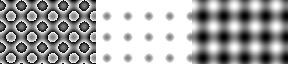

In [27]:
import net.imagej.ops.Ops
import net.imagej.ops.special.computer.Computers
import net.imglib2.type.numeric.integer.UnsignedByteType

convertMethods = [
  Ops.Convert.Copy.class,
  Ops.Convert.Clip.class,
  // HACK: convert.scale op is disabled here due to a bug in Ops.
//  Ops.Convert.Scale.class,
  Ops.Convert.NormalizeScale.class
]

convertedImages = []
for (convertMethod in convertMethods) {
  // Create a uint8 destination image for the conversion.
  convertedImage = ij.op().run("create.img", imageToConvert, new UnsignedByteType())

  // Look up the needed convert op for converting from source to destination.
  inType = imageToConvert.firstElement() // Type from which we are converting.
  outType = convertedImage.firstElement() // Type to which we are converting.
  convertOp = Computers.unary(ij.op(), convertMethod, outType, inType)
  
  // NB: Prepare the convert op to behave properly.
  // The need for these calls is hacky, and will be fixed in a future version of Ops.
  convertOp.checkInput(inType, outType)
  convertOp.checkInput(imageToConvert)

  // Run this convert op on every sample of our source image.
  ij.op().run("map", convertedImage, imageToConvert, convertOp)
  methodName = convertMethod.getField("NAME").get(null)
  printMinMax(methodName, convertedImage)
  convertedImages.add(convertedImage)
}

tile(convertedImages)

The code above makes use of the `map` op to execute the appropriate `convert` op on each element of a collection. 

## Filtering

There are lots of image filtering operations available in the `filter` namespace:

In [28]:
ij.op().ops().findAll{op ->
  op.startsWith("filter.")
}.collect{op -> op[7..-1]}

addNoise
addPoissonNoise
convolve
correlate
createFFTOutput
dog
fft
fftSize
gauss
ifft
linearFilter


Here is a demonstration of some of them:

In [29]:
ij.op().help("filter.addPoissonNoise")

Available operations:
	(RealType out) =
	net.imagej.ops.filter.addPoissonNoise.AddPoissonNoiseRealType(
		RealType out,
		RealType in,
		long seed?)
	(IterableInterval out) =
	net.imagej.ops.filter.addPoissonNoise.AddPoissonNoiseMap(
		IterableInterval out,
		IterableInterval in)

In [30]:
imageToFilter = image32
radius = 3

// We will use a 3x3 diamond as our neighborhood here.
import net.imglib2.algorithm.neighborhood.DiamondShape
shape = new DiamondShape(radius)

// Add Poisson noise.
addPoissonNoise = ij.op().run("create.img", imageToFilter)
ij.op().filter().addPoissonNoise(addPoissonNoise, imageToFilter)

// Gaussian blur.
gauss = ij.op().filter().gauss(imageToFilter, radius)

// Median filter.
median = ij.op().run("create.img", imageToFilter)
ij.op().filter().median(median, imageToFilter, shape)

// Min filter.
min = ij.op().run("create.img", imageToFilter)
ij.op().filter().min(min, imageToFilter, shape)

// Max filter.
max = ij.op().run("create.img", imageToFilter)
ij.op().filter().max(max, imageToFilter, shape)

// Display the results side by side.
[
    [["image":imageToFilter, "poissonNoise":addPoissonNoise, "gauss":gauss]],
    [["median":median,"min":min,"max":max]]
]

image,poissonNoise,gauss
median,min,max


Finally, let's take a special look at the Difference of Gaussians op, `filter.dog`:

### Image features

In [31]:
imageToProcess = image32
sigma1 = 5
sigma2 = 10

// Difference of Gaussians.
dog = ij.op().filter().dog(imageToProcess, sigma1, sigma2) // gauss(sigma2) - gauss(sigma1)

// We can also use eval to perform the DoG.
vars = [
  "i": imageToProcess,
  "sigma1": [sigma1, sigma1],
  "sigma2": [sigma2, sigma2]
]
evalDoG = ij.op().eval("gauss(i, sigma2) - gauss(i, sigma1)", vars)

[["dog":dog, "evalDoG":evalDoG]]

dog,evalDoG


## Convolution, deconvolution and Fourier transforms

### Convolution

Convolution is a very helpful filter for many circumstances. Below is an example of how to use the convolution filter. 

In [32]:
import net.imglib2.type.numeric.real.FloatType;
import net.imagej.ops.Op

// create the sample image
base = ij.op().run("create.img", [150, 100], new FloatType())
formula = "p[0]^2 * p[1]"
ij.op().image().equation(base, formula)

// create kernel
kernel_small = ij.op().run("create.img", [3,3], new FloatType())
kernel_big = ij.op().run("create.img", [20,20], new  FloatType())

ij.op().image().equation(kernel_small, "p[0]")
ij.op().image().equation(kernel_big, "p[0]")

// convolved
convolved_small = ij.op().filter().convolve(base, kernel_small)
convolved_big = ij.op().filter().convolve(base, kernel_big)

[["base":base, "small kernel":kernel_small,"big kernel":kernel_big, "small convolved":convolved_small, "big convolved":convolved_big]]

base small kernel big kernel small convolved big convolved <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJYAAABkCAYAAABkW8nwAAANiElEQVR42uWd6ROIZRfGj0oblaUkKmWPIhSiFSGptGmPikJISGlRVIoWWyVL+75Soj1btCBRVLJUZGuhaKFyvfN+uL6cmXvOM3PPPefD/fwNv7nmN9dcz7lFRFCiRAnstNNO2HnnnbHLLrugZMmS2HXXXbHbbrth9913xx577IE999wTpUqVQunSpbHXXnth7733xj777IMyZcqgbNmyKFeuHMqXL499990X++23HypUqID9998fFStWxAEHHIBKlSqhcuXKOPDAA3HQQQfh4IMPRpUqVXDIIYfg0EMPRdWqVVGtWjVUr14dNWrUQM2aNVGrVi3Url0bhx12GOrUqYO6devi8MMPxxFHHIF69eqhfv36OPLII9GgQQM0bNgQjRo1wlFHHYWjjz4ajRs3RpMmTdC0aVMcc8wxaNasGZo3b45jjz0Wxx13HI4//niccMIJOPHEE3HSSSehRYsWaNmyJVq1aoWTTz4ZrVu3Rps2bdC2bVuccsopaNeuHU499VS0b98ep512Gk4//XScccYZ6NChA84880ycddZZOPvss3HOOefg3HPPRceOHXHeeefh/PPPxwUXXIALL7wQF110ES6++GJccskluPTSS9GpUyd07twZl112GS6//HJcccUV6NKlC7p27Yorr7wSV111Fbp164bu3bujR48euPrqq9GzZ0/06tULvXv3xjXXXIM+ffrg2muvRd++fdGvXz/0798f1113HQYMGIDrr78eN9xwAwYOHIgbb7wRN910E26++WbccsstGDRoEG699VbcdtttGDx4MIYMGYLbb78dd9xxB+68804MHToUd911F+6++24MGzYMw4cPxz333IN7770X9913H+6//36MGDECI0eOxKhRozB69GiMGTMGDzzwAB588EEIgSJgBIqAESgCRqAIGIEiYASKgBEoAkagCBiBImAEioARKAJGoAgYgSJgBIqAESgCRqAIGIEiYASKgBEoAkagCBiBImAEioARKAJGoAgYgSJgBIqAESgCRqAIGIEiYASKgBEoAkagCBiBImAEioARKAJGoAgYgSJgDz30EMaOHQvRCaUTTCeUTjCdUDrBdELpBNMJpRNMJ5ROMJ1QOsF0QukE0wmlE0wnlE4wnVA6wXRC6QTTCaUTTCeUTjCdUDrBdELpBNMJpRNMJ5ROMCYUgSJgohNKJ5hOKJ1gOqF0gumE0gmmE0onmE4onWA6oXSC6YTSCaYTSieYTiidYDqhdILphNIJphNKJ5hOKJ1gOqF0gumE0gmmE0onmE4onWAEioAxwcRyKMvBLIeyHMxyKMvBLIeyHMxyKMvBLIeyHMxyKMvBLIeyHMxyKMvBHn74YYwbNw7jx4/HhAkTMHHiRDzyyCMQy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwy6EsByNQBOzRRx/FY489BrEcynIwy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwy6EsB7McynIwJhSBImBiOZTlYJZDWQ5mOZTlYJZDWQ5mOZTlYJZDWQ5mOZTlYJZDWQ5mOZTlYASKgDHBJLaHiu3BYnuo2B4stoeK7cFie6jYHizUQ1HKQw5FoEIOJrE9VGwPFttDxfZgsT1UbA8W20PF9mChHoqAhRyKgIUcTGJ7qNgeLLaHiu3BYnuo2B4stoeK7cFCPRSBCzkUgQs5mMT2ULE9WGwPFduDxfZQsT1YbA8V24OFeigCFnIoAhZyMIntoWJ7sNgeKrYHi+2hYnuw2B4qtgezHMpysFAPJrE9VGwPFttDxfZgsT1UbA8W20PF9mCWQ1kOFurBJLaHiu3BYnuo2B4stoeK7cFie6jYHsxyKMvBQj2YxPZQsT1YbA8V24PF9lCxPVhsDxXbg1kOZTlYqAcT7z2U9x7Mew/lvQd7/PHH8cQTT+DJJ5/EU089haeffhrPPPMMnn32WTz33HN4/vnn8cILL+DFF1/ESy+9hJdffhmvvPIKXn31VUyaNAmTJ0/Ga6+9htdffx1TpkzBG2+8galTp0K891DeezDvPZT3HoxAETACRcAIFAEjUASMQBGwadOm4c0334R476G892DeeyjvPZhOKJ1gOqF0gjGhCBQBE+89lPcezHsP5b0H0wmlE0wnlE4wAkXAmGDivYfy3oN576G892CWQ1kO9tZbb+Htt9/GO++8g3fffRfvvfce3n//fYj3Hsp7D+a9h/Leg1kOZTkYgSJgH3zwAaZPnw7x3kN578G891DeezDLoSwHY0IRKAIm3nso7z2Y9x7Kew9mOZTlYASKgDHBxHsP5b0H895Dee/BQj0UpTzkUAQq5GDivYfy3oN576G892ChHoqAhRyKgIUcTLz3UN57MO89lPceLNRDEbiQQxG4kIOJ9x7Kew/mvYfy3oOFeigCFnIoAhZyMPHeQ3nvwbz3UN57MMuhLAcL9WDivYfy3oN576G892CWQ1kOFurBxHsP5b0H895Dee/BLIeyHCzUg4n3Hsp7D+a9h/Leg1kOZTlYqAeT3O9D5X4fbMaMGZg5cyZmzZqF2bNn48MPP8ScOXMwd+5cfPTRR/j444/xySef4NNPP8W8efMwf/58LFiwAJ999hkWLlyIzz//HIsWLcLixYvxxRdf4Msvv8SSJUsgud+Hyv0+GIEiYASKgBEoAkagCBiBImBLly7FV199Bcn9PlTu98F0QukE0wmlE4wJRaAImOR+Hyr3+2A6oXSC6YTSCUagCBgTTHK/D5X7fTDLoSwH+/rrr/HNN99g2bJl+Pbbb7F8+XKsWLECkvt9qNzvg1kOZTkYgSJgK1euxKpVqyC534fK/T6Y5VCWgzGhCBQBk9zvQ+V+H8xyKMvBCBQBY4JJ7vehcr8PFuqhKOUhhyJQIQeT3O9D5X4fLNRDEbCQQxGwkINJ7vehcr8PFuqhCFzIoQhcyMEk9/tQud8HC/VQBCzkUAQs5GCS+32o3O+DWQ5lOVioB5Pc70Plfh/McijLwUI9mOR+Hyr3+2CWQ1kOFurBJPf7ULnfB7McynKwUA8mud+Hyv0+2HfffYfvv/8eP/zwA1avXo01a9bgxx9/xNq1a7Fu3TqsX78eGzZswMaNG/HTTz/h559/xi+//IJff/0VmzZtwubNm/Hbb7/h999/x5YtW7B161b88ccfkNzvQ+V+H4xAETACRcAIFAEjUASMQBGwP//8E3/99Rck9/tQud8H0wmlE0wnlE4wJhSBImCS+32o3O+D6YTSCaYTSicYgSJgTDDJ/T5U7vfBLIeyHOzvv//Gtm3bsH37dvzzzz/4999/8d9//0Fyvw+V+30wy6EsByNQBGzHjh34/ye534fK/T6Y5VCWgzGhCBQBk9zvQ+V+H8xyKMvBCBQBY4JJ7vehcr8PFuqhKOUhhyJQIQeT3O9D5X4fLNRDEbCQQxGwkINJ7vehcr8PFuqhCFzIoQhcyMEk9/tQud8HC/VQBCzkUAQs5GCS+32o3O+DWQ5lOVioB5Pc70Plfh/McijLwUI9mOR+Hyr3+2CWQ1kOFurBJPf7ULnfB7McynKwUA8mfHWcj0TrV8lDb/7yAUTrzWDrzeFU7+UVvVOe6j5U0f/yUu2hivZQqfZgQqAImH6VPPTmLwGz3gy23hxO9V5e0Tvlqe5DFf0vL9UeqmgPlWoPJjqhdIKF3vwlcNabwdabw6neyyt6pzzVfaii/+Wl2kMV7aFS7cFEJ5ROsNCbvwTMejPYenM41Xt5Re+Up7oPVfS/vFR7qKI9VKo9mFgOZTmY5VCWg6V6L6/onfJU96GK/peXag9VtIdKtQcTy6EsB7McynKwVO/lFb1Tnuo+VNH/8lLtoYr2UKn2

ImageJ can automatically select which filter to use according to the size of kernel. If kernel is small enough, then NaiveF (brute force way, not efficent at all, but useful when kernel is small) is used, otherwise, fast fourier transforms is used.

In [33]:
op = ij.op().op("filter.convolve", image, kernel_small)
op2 = ij.op().op("filter.convolve", image, kernel_big)

[op.getClass().getName(), op2.getClass().getName()]

net​.imagej​.ops​.filter​.convolve​.ConvolveNaiveF
net​.imagej​.ops​.filter​.convolve​.ConvolveFFTF


###  Deconvolution

Deconvolution in ImageJ is implemented using [Richardson–Lucy deconvolution algorithm](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution).

In [34]:
import net.imglib2.util.Util
import net.imglib2.outofbounds.OutOfBoundsConstantValueFactory
import net.imagej.ops.deconvolve.RichardsonLucyF

base_deconvolved = ij.op().run(RichardsonLucyF.class, convolved_small, kernel_small, null, new OutOfBoundsConstantValueFactory<>(Util.getTypeFromInterval(kernel_small).createVariable()), 10)
base_deconvolved_big = ij.op().run(RichardsonLucyF.class, convolved_big, kernel_big, null, new OutOfBoundsConstantValueFactory<>(Util.getTypeFromInterval(kernel_small).createVariable()), 10)

[["small kernel":base_deconvolved, "big kernel":base_deconvolved_big]]

small kernel,big kernel


### Fourier transforms

Fourier transform is very easy to use in ImageJ. With FFT ops, one can take an image as input and get result easily.

In [35]:
import net.imglib2.type.numeric.real.FloatType

// create image
fft_in = ij.op().run("create.img", [150, 100], new FloatType())
formula = "p[0]^2 + p[1]"
ij.op().image().equation(fft_in, formula)

// apply fft
fft_out = ij.op().run("filter.fft", fft_in)
["original image" , fft_in]

original image


The usage of Inverse FFT is very similar to FFT. Here we are going to invert the result we got from the above example. The result is the same as the original image.

In [36]:
import net.imglib2.type.numeric.real.FloatType

inverted = ij.op().run("create.img", [150,100], new FloatType())
ij.op().filter().ifft(inverted, fft_out)
[["Inverted image": inverted]]

Inverted image


## Transforming images

Image transformations such as rotation, scaling and cropping are accomplished using ops of the `transform` namespace.

Most ops of this namespace have the nice property of being _views_: they do not actually copy image samples, but rather wrap the image, offering a modified "window" into the original data. Using views helps to greatly reduce computer memory usage, at a very minimal time performance cost. If you need a deep copy of the image for some reason (e.g., if time performance is paramount, or if you want to modify the transformed image samples in-place without affecting other transformed versions of the image), you can still copy it using the `copy` namespace; see "Generating images" above for details.

In [37]:
ij.op().ops().findAll{op ->
  op.startsWith("transform.")
}.collect{op -> op[10..-1]}

addDimensionView
collapseNumericView
collapseRealView
collapseView
crop
dropSingletonDimensionsView
extendBorderView
extendMirrorDoubleView
extendMirrorSingleView
extendPeriodicView
extendRandomView


### Rotating an image

The `transform.rotateView` op rotates the image 90 degrees from one dimensional axis to another. E.g., in the 2D case, rotating Y &rarr; X is a clockwise rotation, while rotating X &rarr; Y is a counterclockwise one.

In [38]:
ij.op().help("rotateView")

Available operations:
	(MixedTransformView out) =
	net.imagej.ops.transform.rotateView.DefaultRotateView(
		RandomAccessible in,
		int fromAxis,
		int toAxis)

Here is an example usage of the `transform.rotateView` op.

Note that at the moment, for rather technical reasons, rotating an image removes the bounding box; for the rotated result to be fully usable afterward, a new bounding box must be specified. If you want to understand this, then study the following code carefully to see how this is done using the `transform.intervalView` op, which adds or changes the bounding box of an image. Otherwise, you may simply copy the `rotate` function below and enjoy. The `rotateView` op in a future version of ImageJ Ops will probably rebound the image automatically, to avoid this complication.

Old bounds: (0, 0) - (159, 99)
New bounds: (-99, 0) - (0, 159)


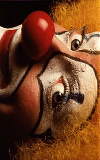

In [39]:
def rotate(image, fromAxis, toAxis) {
  // Perform the rotation.
  rotated = ij.op().run("rotateView", image, toAxis, fromAxis)
  
  // Adjust the bounds to match the rotated interval.
  // Some day, the rotate op will take care of this automatically.
  min = new long[image.numDimensions()]
  max = new long[image.numDimensions()]
  image.min(min)
  image.max(max)
  minFrom = min[toAxis]; minTo = -max[fromAxis]
  maxFrom = max[toAxis]; maxTo = -min[fromAxis]
  min[toAxis] = minTo; min[fromAxis] = minFrom
  max[toAxis] = maxTo; max[fromAxis] = maxFrom
  return ij.op().run("intervalView", rotated, min, max)
}

bounds = {interval ->
  return "(" + interval.min(0) + ", " + interval.min(1) + ") - " +
         "(" + interval.max(0) + ", " + interval.max(1) + ")"
}

// Define our axis indices, for readability.
// In this case, we have a priori knowledge.
x = 0; y = 1; c = 2

// Rotate the image.
rotated = rotate(image, y, x) // 90 degrees clockwise
//rotated = rotate(image, x, y) // 90 degrees counter-clockwise
//rotated = rotate(image, x, c) // rotate through channels! WAT

// The interval bounds have changed!
println("Old bounds: " + bounds(image))
println("New bounds: " + bounds(rotated))

rotated

### Cropping an image

The `transform.crop` op crops an image N-dimensionally. E.g., you can use it to create a substack of a 3D dataset, cut out irrelevant channels, or crop the XY planes as with 2D image processing software.

In [40]:
ij.op().help("crop")

Available operations:
	(ImgPlus out) =
	net.imagej.ops.transform.crop.CropImgPlus(
		ImgPlus in1,
		Interval in2,
		boolean dropSingleDimensions?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.crop.CropRAI(
		RandomAccessibleInterval in1,
		Interval in2,
		boolean dropSingleDimensions?)

Below, we show two ways to crop an image: 1) with `transform.crop`; and 2) using `transform.intervalView`. The former translates the image back to the origin, while the latter does not.

In [41]:
import net.imglib2.FinalInterval
region = FinalInterval.createMinSize(75, 27, 0, 40, 28, 3)

eye = ij.op().run("crop", image, region)
eyeView = ij.op().run("intervalView", image, region)

[["eye":eye, "view":eyeView]]

eye,view


### Scaling an image

To perform [image scaling](https://en.wikipedia.org/wiki/Image_scaling), use the `transform.scaleView` op. You already saw it in action in the "Getting started" section, but here it is again—this time enlarging an image rather than reducing it.

Just for fun, we compare three different interpolation strategies: [nearest neighbor](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation), [N-linear](https://en.wikipedia.org/wiki/Linear_interpolation), and [Lanczos](https://en.wikipedia.org/wiki/Lanczos_resampling).

In [42]:
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
import net.imglib2.interpolation.randomaccess.LanczosInterpolatorFactory

scaleFactors = [4, 4, 1] // Enlarge X and Y by 4x; leave channel count the same.

nearestNeighborEye = ij.op().run("scaleView", eye, scaleFactors, new NearestNeighborInterpolatorFactory())
nLinearEye = ij.op().run("scaleView", eye, scaleFactors, new NLinearInterpolatorFactory())
lanczosEye = ij.op().run("scaleView", eye, scaleFactors, new LanczosInterpolatorFactory())

[["nearest neighbor":nearestNeighborEye, "N-linear":nLinearEye, "Lanczos":lanczosEye]]

nearest neighbor,N-linear,Lanczos


Of course, some detail from the original image has been lost, since we scaled down and then back up again.

### Padding an image

The `transform.intervalView` can also be used to expand the bounding box of an image. However, there is one catch: you must first decide what the out-of-bounds sample values will be. The `transform.extend` ops achieve this goal. If you forget to extend the image before padding it via `intervalView`, you will receive an exception when attempting to query any out-of-bounds samples.

Note that like `transform.rotateView` the various `transform.extend` ops explicitly remove the bounding box of an image, expanding the defined sample values to infinity in all directions. In most circumstances, you will want to use `transform.intervalView` to rebound the image after extending it.

In [43]:
ij.op().ops().findAll{op ->
  op.startsWith("transform.extend")
}.collect{op -> op[10..-1]}

extendBorderView
extendMirrorDoubleView
extendMirrorSingleView
extendPeriodicView
extendRandomView
extendValueView
extendView
extendZeroView


Here are some side-by-side examples of what happens when you pad an image with these various approaches:

In [44]:
def pad(image, extended, t, r, b, l) {
  min = new long[image.numDimensions()]
  max = new long[image.numDimensions()]
  image.min(min)
  image.max(max)
  min[0] -= l; min[1] -= t; max[0] += r; max[1] += b
  return ij.op().run("intervalView", extended, min, max)
}

// Define the top, right, bottom and left padding amounts.
t = r = b = l = 20

// Pad the image with different out-of-bounds strategies.

extendedBorder = ij.op().run("transform.extendBorderView", eye)
paddedBorder = pad(eye, extendedBorder, t, r, b, l)

extendedMirrorDouble = ij.op().run("transform.extendMirrorDoubleView", eye)
paddedMirrorDouble = pad(eye, extendedMirrorDouble, t, r, b, l)

extendedMirrorSingle = ij.op().run("transform.extendMirrorSingleView", eye)
paddedMirrorSingle = pad(eye, extendedMirrorSingle, t, r, b, l)

extendedPeriodic = ij.op().run("transform.extendPeriodicView", eye)
paddedPeriodic = pad(eye, extendedPeriodic, t, r, b, l)

minValue = eye.firstElement().getMinValue().doubleValue()
maxValue = eye.firstElement().getMaxValue().doubleValue()
extendedRandom = ij.op().run("transform.extendRandomView", eye, minValue, maxValue)
paddedRandom = pad(eye, extendedRandom, t, r, b, l)

value = eye.firstElement().copy(); value.set(100)
extendedValue = ij.op().run("transform.extendValueView", eye, value)
paddedValue = pad(eye, extendedValue, t, r, b, l)

extendedZero = ij.op().run("transform.extendZeroView", eye)
paddedZero = pad(eye, extendedZero, t, r, b, l)

[["border":paddedBorder, "mirror double":paddedMirrorDouble,
"mirror single":paddedMirrorSingle, "periodic":paddedPeriodic,
"random":paddedRandom, "value":paddedValue, "zero":paddedZero]]

border,mirror double,mirror single,periodic,random,value,zero


## Thresholding

Ops has all the same global thresholding methods as ImageJ 1.x, as well as some local thresholding methods.

In [45]:
ij.op().ops().findAll{op ->
  op.startsWith("threshold.")
}.collect{op -> op[10..-1]}

apply
huang
ij1
intermodes
isoData
li
localBernsenThreshold
localContrastThreshold
localMeanThreshold
localMedianThreshold
localMidGreyThreshold


Let's check out the global thresholding algorithms:

In [46]:
threshImage = grayImage

tHuang = ij.op().threshold().huang(threshImage)
tIJ1 = ij.op().threshold().ij1(threshImage) // ImageJ 1.x calls this "Default"
tIntermodes = ij.op().threshold().intermodes(threshImage)
tIsoData = ij.op().threshold().isoData(threshImage)
tLi = ij.op().threshold().li(threshImage)
tMaxEntropy = ij.op().threshold().maxEntropy(threshImage)
tMaxLikelihood = ij.op().threshold().maxLikelihood(threshImage)
tMean = ij.op().threshold().mean(threshImage)
tMinError = ij.op().threshold().minError(threshImage)
tMinimum = ij.op().threshold().minimum(threshImage)
tMoments = ij.op().threshold().moments(threshImage)
tOtsu = ij.op().threshold().otsu(threshImage)
tPercentile = ij.op().threshold().percentile(threshImage)
tRenyiEntropy = ij.op().threshold().renyiEntropy(threshImage)
tRosin = ij.op().threshold().rosin(threshImage)
tShanbhag = ij.op().threshold().shanbhag(threshImage)
tTriangle = ij.op().threshold().triangle(threshImage)
tYen = ij.op().threshold().yen(threshImage)

[
    [["huang":tHuang, "ij1":tIJ1, "intermodes":tIntermodes, "isodata":tIsoData, "li":tLi, "max entropy":tMaxEntropy]],
    [["max likelihood":tMaxLikelihood, "mean":tMean, "min error":tMinError, "minimum":tMinimum, "moments":tMoments, "otsu":tOtsu]],
    [["percentile":tPercentile, "renyi entropy":tRenyiEntropy, "rosin":tRosin, "shanbhag":tShanbhag, "triangle":tTriangle, "yen":tYen]]
]

huang,ij1,intermodes,isodata,li,max entropy
"<img src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAE60lEQVR42u2d664UIRCEef+XPkYTjdnsMEBfq6hJ5o/uObLw0ZfqBsePHj2Fz9AUBE3s0NTCAYi0aAKMDMDOC5o5tt//1k1waxsvwNABClYoBys4XuB13hAMUCoGBLfK6CBqxUFjLwHY2H3eFPg/WUSU73O9BWTKOhEhlAtW5i4A9dxr1QWgQBSAei7eJGw7Xo8APAYku+aq51ILONOu/oKxC0jE56MhrZBNusWFpSP5H7ZP+HZB3JnYLguwshFlARvFdrNF2VmwDov7Bl8UhLKAQbEbm/XLAOU03LnSAr5N1mpMd7P1kwt2sniWRCVyYXfjUAH4Zx4G2oCPFypyYU/GcTt8/wDs+oU/x2ZZrKrvOQsZvCQoAVgYK6HFf5JfQGNA62J5LO7nz1ss19P3uu1pHwOuLsybRrjze2aJj8f4Zf1AXPAKhB6Azj77DR4rnIIPDEBrJrwK8FuMeWpFVxKpqwFkz7xWAIxIDFZ/99UA3hAIP7nNCDBWfs4bQLQy5BTAG+CLBLBCiolsxEioR3PDl2n9vDfDLsSIMWYpgBl12SoAPTTB1Ta0VQA7VltKs+CKxoAs+N6y6VmGvDo/u0nOqWAevE61Jjqy6XLF5XmPY9bVfQL+6UY6laxWpCoBeADgzE1lyD0WgHbdthXuTGvYAsCIYD/avWZkwREu+CTRCd60XAC+uaFO2flJ3LZaVYkEkU6GiQLw6dRdR6nICmUUiGlJSJbwWO3WEOHzhsyzlu5qAaFv2gSptUaDdGpJn7p+ZglMiAtGBRHF+nUD8MkDJpYkMWIly8IyxHzRrngXPsewCb89CCn26+qCZ+AF39SA3a+GOG4UCL/9uXeYNjwzpuwFR948XROR3b8LB/Cb+BmpjEcuIKoF3ymreSce0XM6MlR0AWgT6HfjsZXv7ZnUlABYLdkgbRYreKfJwE6HjFcMmWoBWdxXF+BWLdMMsFXjkF1NoQQQEcQni2HR+rysLBSAbFlltYvd6YSZuT3vW7qi2/sHUxyFkFBZM84gCH6qcoHBFsgjZvWn5TZPDdZDxkkBECWLRALRoulVy1rpMgyShtYFwpWDRdXaplfz6kEcyhX7RWpdKGW2DBA94KME0HPRLLcUdOvz8xy/F3yQAEb1xe1Y14zxZMJ4cr2H1yWeMABWW4qdBgAkEd7a9GqFEQLADq7Kemkl00Zd8Qg0FrBTrITyXylkz1eaDsgKH+vtpNVxJSyAaNJFR/A6hS5QQjSqfnab5fM6otEGQCTNTNDNbx+bJW1mACtushKEGHM4UwfaAYgo2Aq8dXlm46xx33qjIMTdwBufu6NAr77HGvjeMuGRWUEQhNyWb5aUhAF4yyv4bPXlSUUpjn5U0FiPomZv0jAZ5gYIO3W8oM+pXLBzc+oNpcmsJgUBaISQvTqUcJlmfmZE4DaiboqiD13SAWSuDXv0FjJ7jkVj1F/CYIEQ6fxI4j3WAtCzW1rv4AOwQ6OqNT7UWwggUwfNYpevXkYAq7p9T+9DEVyNAGRwxbs3UgkuUgDRDjAJMgGYVnwXiJcB2MEtK0MGATDSCnY7nCMIiQBErC8LQDILyNQ9LehAXTADhAKONAZEaVG3jpcQYgHYsEeO9rgDHYBorrgLzALwomOKHmMmjiXxAEQ/XyL4SCohjAecLnO/qgWjxYGSYVQHlh7o+P4ChJlAJM9ljmkAAAAASUVORK5CYII="" />","<img src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAFDklEQVR42u2d2Y7kIAxF+f+f7nmZ1oxKFBjwcm3fSJF6SacSfPAOPX4KHmOMHx5JZEVodJ799/l/v/48P6+d/Y4AgggRHWYPiLqAWVIDasPspbV2968IZak3+jSDWcBbvYcETAII6o9pgIf4bpV8yIE2wCgAIk+uSiCWArAqeCcgEsBACG8FkVqDJIdxoA6q19+X8KMSQziQB/U1evTyO5FBRH/HgT6gXUypBYQ0wc4R7c31HWAkgA6z2Pr6KgCivfeIGhgEbcmjEYAzx3hWciKA9hMfKTgZUQMgOa0AlF5rKaCI1AliimZEzkYJgCewaF4XCaBlixd9wAthS2C0ADB6AnpBGDkeaRyhnWC0zS8CfJZ9hyi+4KgAn3QQI+D7lgaJgg9QtgMevt0MRvF/Tj4DAUAQa4A92yQaJArA2w5sJA0YLf+BrPK/RcSnwroF1iqSRjS/mssZrgHM0oJ+I7Db8p6FFqXvl8wEv+YKT0H99v1qfe+LT6oFoCSVdfp7B795pFwHcTJIN5pyZpZ2k+DVjWhaHsR/eckuAy+O9mr5o3SnA2mA5Angqx/rkawe3rVIb79Jkj+8OVdac1Vp0K59v2QDZtpb8rVJHjDSFETk5rTAm2kTjXvfplF2Puzp9eayj4bPM43zAqBWMKHxeRK3YeeHSu7tAWRLADW1k6YJPa117wKcU7O76tVsHYS8AmgJ36urcfoMt+Z9Bd/KvQiPglGDEgTt9xpBvsKkCeHJJDEF0LkMky7wkLzPabOtJMF+2k1+Y+Ilpls7OT2io1/Pzl9rzaetpSR5Rq3PePFTH9NrGEVwawBvtJFWxK0hXCsItTVpKhNsoQWtB/S2GqOZAK8AHpQGjAbQ+3nRtFgUfBAAamrdyIHsBKIpgFm1YPRAVgFw9VwvLgcBTLYaLguc6lFwtnQMtV4MgKYm+CUP5u0DZlvmmF0Lao7p33vopCYigpBs2q8igK8LvoZmKQddkChHJdik7WeLMdBvTSKAvSB8UUTDIlRHFR7aoV0vTuoHYiYorQTnlRR/1ArQZbjT6HizrCEPeNoC0I7Gdz/TalSoYJL/A3ekNGnZtPZk4KG1msekvg5CKiV1PWvcq+jRuowW1W0tkNdgSsOhHa16/u/Ux342wVXTGd4m2BuMaAgnE57wZUsnvWp060kgCcSuAeyWzPVowIhIk3i0bq0mQFoAk657gAgWJnVYVU0n1b5PQUjX0lXmYMPC9Ervt/H/zgDsAJ4ke985yr3dwm7hehDAkw2MCJ5eKgsaQCQze5PS0HpndMi/1YEl38MCiOjr0ULcBSKC58ZK0iIHG+wvfB/LiVaPj4IzlpJQoEOwGLsa92oMwwGsuuC6q9a7sCphe4KUXvHfDT5JUPZFG/oJqtu2E1atXdkWr2+usxdS571P2Na1hbRfaYoQQp1xeTNCyKbWUfSlSkFYfIwJGVvQQqsnBAyxFJk5gKMGTAxhZvgIYBEQm40lYbrp9FDeprbzSdBeGlQ9/0UDASSE1yB27IqGALCCs30DFAEE0oAV/CNqtsRRcBUnnQAm9gEr9r8RRgJICAmgX+K2UpDCMyAN0wlCglUUwEypmwwLywlgAwh5AlVCpFBVMMeEMCGAu02BKFQC2HafPZriRgBWgZHwFQAwI4h0FwoCSGESQJhkdLbNeQhacgDpBxLAEAArRcEEkVEw7OImAshmBAJIAOumZAhhgX7AKvsNErp/5x8vzIzaDAIDYQAAAABJRU5ErkJggg=="" />","<img src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAFGklEQVR42u2d227cMAxE9f8/nT4lQBdri5RIijOaBYwWaNK1zePhVfL40Uefg5+hWxB0I8f47++/x9PPPv2bAGxixO6wCSAyADsb9PfcPv8U3HLBr6BEwdABClYw6a4owlBdoJs9EAxAKgYECwWeDgEIbnw0QwrAphCu/D6yEdFV8fpaAlNwjwghZRbMEvPd4JpVTZWqC8AohVJ3Ag/EwXTjBCvedQ/dXH2uA

Let's try some local thresholding. This is a bit more complex, because local thresholding algorithms typically need a neighborhood, and often some other secondary parameters. We will take the Bernsen algorithm for a spin:

In [47]:
ij.op().help("threshold.localBernsenThreshold")

Available operations:
	(IterableInterval out) =
	net.imagej.ops.threshold.localBernsen.LocalBernsenThreshold(
		IterableInterval out,
		RandomAccessibleInterval in,
		Shape shape,
		OutOfBoundsFactory outOfBoundsFactory?,
		double contrastThreshold,
		double halfMaxValue)

In [48]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

threshImage = grayImage

// Secondary parameter values. These are wild guesses.
contrastThreshold = 10
halfMaxValue = 10

// Let's try with a variety of neighborhood radii and compare side-by-side.
import net.imglib2.type.logic.BitType
radii = [1, 3, 5, 8, 12, 15]
bernsenImages = [:]
for (radius in radii) {
  binaryImage = ij.op().run("create.img", threshImage, new BitType())
  ij.op().threshold().localBernsenThreshold(binaryImage, threshImage, new HyperSphereShape(radius),
                                            contrastThreshold, halfMaxValue)
  bernsenImages.put("radius " + radius, binaryImage)
}
[bernsenImages]

radius 1 radius 3 radius 5 radius 8 radius 12 radius 15 <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAM0klEQVR42t2dgW4rOQ4E/f8/vXc47D1skrFUVdTYzgYIAiR2PKOhyGY3ST3+Wnw9Ho+/dl9Xr/n/765+/vP139/7/e/k65/v+f7T/I9n71/9bvVZ02tarRF5RubZfX8+9X/ae/37sx4/Hub3C7n63dWDsO/b/a48rNWiPrve1etWG+RqvZ59r15P72tlKM/WcnUtdIPt1vTqPq6czuV1PPuQ1Y549vrdrljt3uL9Vp+zMyKy4MQgTn/b9SD/y3hOstl2Bk/f879vclOrXbgKrc+MdLdjanhZbQyywZ5dZ/Vc081D1nG1NqtnRv4v9eK71268+ANjtd2HGQOju8U8hJ23XV2DMT7ywOkDIqFtZ/A0PK+Mg97zbu2sPT12O2jycAkGs7txAqR3SdBqh9Pka+fNavJBro1uMmpQNmmkTuZHEkIWmmAKmzXvFpDi0t3up0Zq12JlXCRZM/Ck4EcSgk1YR5hOeEOcBe9CJFk0QwMQwyULZTYCvU4L5s3D3hkyMbAJTTJ1QhZX/smCSVJBDYBiluJFicc0+NVmvgTcUyOz3p9m9dRRrJ43xcSUM93c8wMDfAuQKS6jmMX+NJ5px2kab7gLzZSbo96fbrKC3ShfSDfOj7/THU0ywPLAjXs3xlH5Lov9KClc6COSMFmMWv9GuGGKYS8NkGIAAkINc293KWHZzYOi92BwHU1ydviNeMqpylT+dzG8xYbj4Yuk8TaVJ7uQ7mzyWRPPVwybemUb9iycqaG54FHKAvzhAav1mvSbetIKCShRTAyw4qUTG8Yke+YeC9NglSTqVL68n7hju1ssg268lqFSCFSwWWeRsAxJTg3bqBMGQxKvN9X1L0Ow0RYLm08raUqGabJswiNans543YlGTKW3uoYG51ki/Ona2VTfXJAVuW2osPqnEegVlSAy4aI1Vxw50bdpaRv1lE9/UrLSeA+LY4oYb/XoCfajWatRWci9n0iOSKZt6CKrBQPo5DM8Embowpoi0BO4COqTivQuVcRV6J8Q2iYCGO7TVuN8+RvlcopnoYtP9U8LwGl2XZSaaYm9KWeim9V4cgJ3iEI0UXX+eEBKoxilwFZYl+yMbABTck+VgaKbFgLaZOOlQLRKotTLIyXKeiYDhKt0M8nKqjZZpEJTcHpXdZHtN5mqKKXCemkbZJELwWlBesnkKHlqVABD99hqEqotE0xoQrpNkGryZGsBvtQDniqPLwWW4mLHJUu2rdE2ZU1UIWNA5jPodRB2wnwGpNJccaMt5zb1cPQhEbrIKiW0ldHQGqZww2ixtgjAluJT6GEKF57ax8QLGFGc4JjThl2Y/5JQTTdvIXKpHGrpFROmqSq0hD5V9qFFnLbezFI2k81CqQSzAQx8MFl8KUaw9Jh5RkZ+27yuj2IwFAD1dkW9MIStwbgma6YeiBK3hsi3ern1kgV7ioYtPrLCktNGQ6Y3RRWAUvpl+mZp1KDGZ4p16RpOyt1M0mQSs8u2TIItTJZDvZmtvrXh2hqpNRLL3VUKycCBSQ0ixbFU30f/z4QOKotZSap4OAqAbTWKxUSVCDb3TBv/q/RmEyHJ863vvbDcdG5M6eK3nq4WwE66vGgHneFCDW6yGXsxVCoFWj354n0PJJ9NC0GtJzWg2Qj3hi6pDTelSMKGfjMqzzZ4GX7RbKynGLBUK0+ro63MVTg3m6BUtcNKhIbstdl5HShEn43ZPMRbbnlAo+fa+TH2wezC0nQopZ3BUvGs8eIWUhjmghDGNEJST3zx+pmmaQzY1LeZpIgu5insY5IQm1jZghCLHS1dZgw9Tmx1s0KsiG55NSv8F/mu1seRMG8mrErRHq0r7XcxWLtmyChBM/rtLguuWmbpUCsSmMUnVJmweqkldG17gKGedlDANouRYZg/xrOVXo1KFlti80RYN5inZtGUgrAPyoRKSztR0aEQ3IKgZpTLBLRbuqTO4KvqAMk0bdZIkyir31IoYjyiUXMkx0c+38/Tm4QXWl1iQm/tN7alTkZDroUcZqPU9giTxVvqKuBU3rdA02s7Hu3UopfJVPZwGlNQa6U3oyhNmoYs7rRN6iZ6PUxlhS1UrNKaCV9GJbAlXVWyK7JU4QxtM7mpLbRrWJmBx2T8lq08ofV+pdq6cnzTmSulGLSc5mRG+9p2zNr5ZntwnvKAReqymjHxfkWym3JiduJBTVZM5DAkN4U2dpMWLrRwqo+puG2nT9Xp+TThKHxWHbhYdGQid04OxSnTCyrhTXnhJewotMAElxl8RMT2cgKnMSxT3Uw3hiG0yxg0S4GVRKQWIl9ck8uuTBZUgKsZ7WaBtclmKUaysOPUgYb13JRadEy9G01Cf2jBJI02Rnry+NWShU+bbwrGnR7LavDgLuKcUKVMQmYLlL8Q0YaBr91qExnPTrSaSGcUExXOsp5DZ08CqFHMbsRS1HHxej9/74TrNTuegvCTioP15JZPMxRRnYFo5kKTsDvpQ3m6ZvSBlYLV0qQzIVPrKDP6ebXieRfedh7TKBSVTSBkMpVTVcI0ZbXpTqvY0HhgO/uvjrCwIbm0G9jhUPRMYFtkUmksdVTXSS9GicuiG1NjM5XWpS/ETKC3bZxlYhj1ZCb7t1p0GXD01ABLf2rFiUE7VFSH8cinDrsxa0blSCMUkKIImihZ5cMqSQ/LU5lsjeqQdkiRzcTta8oo38l91ENfTrQwUNnTZsAYokzde1URTEFDnZRQ8EkNhxO4cIeRU3XC0Gu1qGH5NxvvLV1C5bHKFdqK3QmJPcFNd3+bNTx1CmitofxiV2bhKrdXmHozcYrAAkNRkKIAWzr/CUZpB6ib4gtDhl8aYMV/dR6JlaBIQmC8b6miKWdpvNLYTnhHmlDSmsatMypVFRMiluLNUvptsapJCupAphOdg4Uqs7yelTAnh0tiAyS8l8VUVYQvBRI0U6fEtJ0GO01cThpmobhK4aqdhrY1QNM8bT1F4ZgMMTqd90eTE6sPmw12YrOacXakAKEMM31qrIWdt9OpTpUr2bPp7IlD9WiuapxFHbI0l8G+lnKpJ7U/PaywSFWnODJbTm7C/wnd02bfloczPJsJnSca0q3TUPr9CX3yFG6ZcIEmi7aDzu1mswcNlvBFEywjVRrsbwtRl0pImWtnRevaeTc1bDtDsBiuzaJNw09RM8rAc6Mp20Nzlvc6NcBydFWdsHqC2piU3NsNUiqxd9yjLZYgqlApaigjf5c8YOEDy1i1cjjhCaOzXWsE8NtG8lPzcMxYPBJK7eHT9QT6pwWpZcqnWVDiPSZqyQRL2on+hsy2Z4RM6gHLhjcwihQ5pJHIEwMs4ZNgl1epCJanJCGW0iE2rE3OYzYGaecS1mLXH1mw8QR1yA6lPl5heIbkntw/5dho3+6rBoeSpOqE7o+0YPOAbNLwSt2UqhV1QlVNvCak9KvW0A6ewu2gE+818WTvNLqJVyv3UquWTVL1jvWi6hDKgk8b4Uly+84FtgUINbQaCZFSMJ8QNSY8Ig7BJkRPNdJXG6A1HAs/JvSQTULe4Qmp8jPCgKUg8kSCYkdSnALck56RqYJg4MG7ja902t2GAd/R73DaAE9O8yrkejn+7B3hl/K5u410mwHakFwTgJMPo0yaqkpRqWX8JGO0Y+OWm/MVHtAy8taTnMiqjZxUcG7dRJ/qBevovB/P7dUGOCm8tJ6zkNHThGLCld6hQt0dgsvZysuS/NO0TJGQJuVCEyXEyGFlMOZJzPUJX1YjvzTCVxrg5GTF2ppYJbndzi2Qwagv7+T5TmPCJU6cGqBJ0Qu4t7KZ8bS7BSrz76ZKy6eE2knk2Ga+p4hoS7ASuc5U1dYKbCOHldG1mAP7JR6Ocqf2PJhxFkw9GJ2uZLBhxU9

Nice illustration of how much better local thresholding can be, eh? The limited scope when thresholding each pixel can go a long way toward correcting for issues like uneven illumination.

## Mathematical morphology

Ops includes operators for [mathematical morphology](https://en.wikipedia.org/wiki/Mathematical_morphology) in both binary and grayscale. The two most basic morphological operators are:

* _erosion_ – reducing bright pixels at the borders
* _dilation_ - growing bright pixels at the borders

The next two most basic are:

* _opening_ - dilation of the erosion
* _closing_ - erosion of the dilation

These latter two are not strictly necessary, since you can simply call `erode` followed by `dilate` or vice versa, but they are convenient as a shorthand.

In [49]:
// HINT: Try different binary images here!
morphImage = binaryImage

// We will use the smallest radius: a single pixel.
import net.imglib2.algorithm.neighborhood.HyperSphereShape
shape = new HyperSphereShape(1)

erode = ij.op().morphology().erode(morphImage, shape)
dilate = ij.op().morphology().dilate(morphImage, shape)
open = ij.op().morphology().open(morphImage, [shape])
close = ij.op().morphology().close(morphImage, [shape])
// Let's also check whether open and close visually match what we expect.
manualOpen = ij.op().morphology().dilate(erode, shape)
manualClose = ij.op().morphology().erode(dilate, shape)

[["erode":erode, "dilate":dilate, "open":open, "close":close, "manual open":manualOpen, "manual close":manualClose]]

erode,dilate,open,close,manual open,manual close
"<img src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAFgElEQVR42u2d3W7sIAyE9/1fuke9q3pSAvbYMzaOtFIvthsCH/4ZDPl8La7P5/OVdX3f6+fH+/8Rbf/5u0/3W31W/1PlQrT1v+ff+WI2fCgAUW0/hQ35UQHvaTKdgvv4jAoWENXp6AFkgocAMsRiLay78f8/cjNMwQJGgHPilr0gsvrABKDFnHYFkOUeI6wiC77ff8MsYFbns0Bmx2VI95zlft0WnpEJZWXBu7+jngh4QFBJwExJCDvTygCwijSSnUkfutGtvmwLIBK+KnocEsIn9x1i7ZQBtEKIyhSricKohGkVQ6ZAqN6pmRaw6uUF8U3DexWTT1wuG0ALVBHgdoEvKovfgbacC97RjSyu0fv9TlemkF0qC96ZGda4LBLWG13ykwuOkGbSAIyWEKxBd1cA/4rhEAkKfH27I4DI77L6JPN+SD1QEkBU471QIeQJJReZAWAofOwkBAUiElS2NWLVNHpi9zIARllDFICK8GVZwfBkA1WOFTkgVveBtGwreQghN7GrouFLaSgAVbPBqDjxJFl5c02RA6YcCp16pnIAnoqcSOklwoKplOCj13Sd99LUxKyL3xErJajq4MgEJCurfbL+zvvlCrMZaf/O71gEW08QHynBWHesMTZJbQGYEXtEztATCxi1+chrAVEeYzXxs+LUl8nN2fOQBaCQ3JBtWVKe3WKdqTEgKG6AAdgdPtR3LHGfKQmx3shqAZElP574TxFAZL8oTJItC8hS4RGdzYz9IjexV4Vv07rmqvBvFRbItUwBlT9E3GU+gzczPwKQpfVF/XYF61d1QuzG+1IAPs2MaLDZg1UZutXz7CaZxy44WpaxqPhW6xe6w39hGbpav9VzuoTok9gMlRFHJzxo4XU1+ztAht7iaV4JUVgVUan0qCZmRxZJhC7FMYoN1AHs7lot1hs0NhoAKh+n2yWRUKhVpBYjRAOoAp9KmKB6frWEBYyAUCFWGvgAFrAigBFlVJ4deN0BDLWA1eLA7I5ktbOKQH3YF7UBrPIujklKDgH0ajwZckylF8F0hs45bnGBdSa4Fd5CNNbPuBZsyQwrwTduOA7CDV44M4LlerOWBCtB6GnXk3qwGuM0AE92S7Ez3mx33NXy7W65kLCArIH7XbWymsHedv71mzdnww+WsMbrRdVFVvQOtKjzcJh9Z9oTopJVZsY/iNpGtQHPAjMtC+6qpSFrG7NKtyxxNqstcAA7amnWdimEDNlyFiAcqPc6eeWFdpVkg9E+4/1qAahe6aEAIbN9Bs8wcV/kczISFKbEZUiC9ODrUvdWQT6KqKc8PBbuDrmFuNjeHsKT0jqIC751mariGm9k/1vqOgfAC/cDRwN4UtThBvAG8N7aU3k9Fz0Oq6oXWEFq5fdWsE4MqFbFQhSmefpYlaQj4xDHVSylPElWY7lpdHi6WMXKXtXVIUUYQwBkak2K5UQKl7rHeGl3HaVdKUhXuap4jEX7+wuzVYosOkzq3balAHjjsRO3gueIGeegxkoANpSD5py7KhA27ecBTR3C5n08kN1e/T0ADoRHqyPV+w6SBQ+EY/G8hQsDYMOTH6od5zYAksv1bwFvsWIyEGVug7wJuDc3PAAG1Abe7F4nCxYqUL3d4h089wCWUaA64JEB7DCAA2FhF9xxi+bAUywGHAjnIwNgl6LWccsFAexYWT0QFpFh/hJlu+2oG7DEATzdR1pxc9PAJQ7gzhEYlVcUxhqKCtFPScgFVR/zUVwJuWHNdCAsBGC3gUKfQtqwj+ocg9GhPGu8hWgM2HFPRMQ5zAPgWD5aeDEAJqwJTxnXdfGy7glUkwUPgNT9E2MFr1ALdHeSDYQDIL0mcADMA5DU3/r7aAfAnAyY1N/6m7hHjskBhNHv/wCDqcAdco0ajgAAAABJRU5ErkJggg=="" />","<img src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAFAElEQVR42u2d2W7rMAxE9f8/nftU4LbxooXLDDkBDPQhtSXqmLuU8Sn2GWOkPDPjuSXWqxo80TD8PO//5/79W8CSAMigBZ/A0mdDjtKAa9B5g/dXm6Kuy8n4fslTAPL4dln+7ZPLcTommWDCuWXOzxK+kgB2cPCtIch0EwSgQEyVc0kAu5nsaAilAeUzpmtEs4BR+NU1yxRj1ZIJwtQxVjKNqk5gyePp+fAAMvgw+vyW46xMf/mqXd94AZhn8lNLcW+dIvrUgG8aRoR0gXV9UdrPf/5P6/YGJVQzAlPaIPJFjLBAFmO+u+fdM77mqogOE8CInsZoiC/nybhgFUDOdkNg5ir/p5f2A5zvEHyNfEAvy3IwX743bnehLOdp5UdlAwjwXPya4dvCRb7l1vdBML/JEJIUrQ00xk6lZDfBujsv5gBvG0DmVMWs4Fbhm0mwepjhTv44jQ+4mnE/AfDu/tYaiwU+j3FRBiFP5Z238a98Z8bnvPruqYa12GfLZJa/0jDVtzKeatgV8/u0cNbadPV/4fY6Iw8uAsBZH/OtuH4HbYT2i84EuABY1RG2hO/NPEeb4FUfGB7AqpGWN3xeEf7OC/ameeF8+sr+nxd80Wmmu7nM+Kwz8GWV/mhLcd0AtLwA02qjlfmNWrCZFM2M1lvNS3rMyeO4uy8AOwQfKAu1E2lbacxdoBwT0rkARiVRvTWFVSQ8u7fCIojyzjlO3jO/CI7gV+2MxbslayUFtDrPzI6iSwArQcjimFsC5OUTelfKygHIFhVGR8Ercogo0w6EBfHusbNyxCsCmJ0bLAMgk8ZDhy8SxlGhKZI4CQsPYUAinntbIFsVAA3CGfC85PeVB2SDkLEMhR543AFnLcfLSggbiIzwZUN44vN5yHN00SIVNPiu/2axh9pLnuNk4rt7IrISuOwuRURQcKXpPGU62Fp82FuRducXEZlmyHQw9pdldINUhi+LgekgBFGjVGnOzDa/2Y2ug3XxWAF8O1V0RYNHlzA9LMpg1hxWEGYHUCvwVQvs2gPIFlB5aMDM1Nao7DdVj+ozfcKUPCAKdBGVhK5+rAA0NFPoIKKOUQB+7DbeWACcFXSgmmLj5wjAmT3E2X5pQnAQpW0xza/VAlhtzFk94m3Vp13Vlt6aKoqBUTkytN4dNrPZHTEz4KEBw9MwrCkVLwhZ27ykAUnhWzHHSCDuajM4H9AjykKCr/oJ9at9nqXTMGg7wzr8PAJwtB3egAh7CT6ChtSK4FXYE53h1qykmMwA3D22TADWCt5O/P5jAK0OYhSE3K5MKoBWR+AKwjpB3CaU46NLm9kTzbJA03EeAlAgCkBdlY7yZZGNAFwMrgSfsQasFLlGHVsW0ZzRJYk/qqVPIk8NtWj6fOs8qe6euANY1ac5OXev20v7yAJytwSLYFfNdze3BU4DVocwqzkA9XdGqAFkqnvKd353T75eUoaeMUFYQzNefocFQLb2fcE3Gc0zAYikCQWhEYxRwureiKnrxhwzAogGofzDZhoQCUIFKYdXpGCqF+u9x1sSZFQAZ7LrkefGZENYVqOia8CoNqvI+XVI+UyPjcUEd4aQDcCl8TH5gKEJUqAktTRgQS3IFIyUjqw7mmDUDpqWNWhkADu09qMAmCbvblEwmxaMgi9N3jLB2BBGAxgua6ZSnACMATBU3gLQVyt4A4gWMEECyFb3RQsevOWRKfd/vW94CKjoIh4AAAAASUVORK5CYII="" />","<img src=""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABkCAYAAAABtjuPAAAFc0lEQVR42u2dSa7cMAxEff9L/wBZJYEjc2YVRQO968Gm

The open and close look good—they match their respective definitions.

Let's quickly try some [grayscale morphological operations](https://en.wikipedia.org/wiki/Mathematical_morphology#Grayscale_morphology) as well. This time we also invoke the [top-hat transform](https://en.wikipedia.org/wiki/Top-hat_transform).

In [50]:
morphImage = grayImage

// We will use a larger radius of 3 for our neighborhood this time.
import net.imglib2.algorithm.neighborhood.HyperSphereShape
shape = new HyperSphereShape(3)

erode = ij.op().morphology().erode(morphImage, shape)
dilate = ij.op().morphology().dilate(morphImage, shape)
open = ij.op().morphology().open(morphImage, [shape])
close = ij.op().morphology().close(morphImage, [shape])
blackTopHat = ij.op().morphology().blackTopHat(morphImage, [shape])
whiteTopHat = ij.op().morphology().topHat(morphImage, [shape])

[["erode":erode, "dilate":dilate, "open":open, "close":close, "black tophat":blackTopHat, "white tophat":whiteTopHat]]

erode,dilate,open,close,black tophat,white tophat


## Nerd digression

Congratulations on making it this far! Here is a cookie for you:

In [51]:
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
wideEye = ij.op().run("scaleView", eye, [2, 1, 1], new NLinearInterpolatorFactory())
ij.op().run("ascii", wideEye)

O###OO**OOOO#O*OOO#OOOOOO*oo***ooo*OOOOOOO#####O*ooooooooooo+ooo********OO####O#
###OOO****o*OOO*o*O####OO**O#O***O###OOO#######O*oooo*****oooo******OO##########
O***o*OOO***OOOO***OOO################O###OOOO#o-+ooo***ooooo***o*******O####OOO
***ooo****OOOOOOO######O**oo*****OOOOOO########O**OOOOO*o*******o*OO*OOOOO######
oooo*oo**OOOOOO*oo+-,-o+---+o+++++oo*O###############O****OOOOOO**o*****OO###O*O
ooo++o*OOO*+--+,.,+-,+*+-+oo*+,o#*-+oo+oooo*OO*O######OOOOOOOOOOOOOO#OO#########
ooooooo+,,,,,-+++ooooO#*+o*OOo-+o+-++++oooo*O*o***OO#####OOO#OOOOOOOOO#OO#######
o**+--+-,,,+*o+*OO*O##########OO#OOO#Oo**O#Oooo*OO*OO**O#OOO*OOO*OOOOOOO########
+++---+--o***OO###########OOOOOO########O##OOOOOOOOO**o**O###O**OOOOOO##########
+oooooo*###########O*o--,,.,,,,----+*O##########OOOOO****O#O*OOO**OOOO#OOO######
*O##############Oo----,,,........,,,-o#########OO#####OO#OOOOOOO#O**OOOO########
o*###OOOOOOOOOO*++--,,,,,,,.......,o###OO#####O#####O#######OOOOO###OOOO##O###O#
--+*O*oo+*#O**Oo-----,,,,..,

So classic!

You _did_ run section 9.2 "Cropping an image" first, right?